In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# QC

In [3]:
df = pd.read_csv('../data/genesXcells_PN_acj6_Chichi.csv', index_col=0)
df.head()

,PN_VT_WT_acj6_B24,PN_VT_WT_acj6_C24,PN_VT_WT_acj6_D24,PN_VT_WT_acj6_E24,PN_VT_WT_acj6_F24,PN_VT_WT_acj6_G24
Genes,,,,,,
ERCC-00002,1,4,10,5,0,6
ERCC-00003,1,0,1,1,0,1
ERCC-00004,1,2,0,0,0,2
ERCC-00007,0,0,0,0,0,0
ERCC-00009,1,0,0,0,0,0


In [4]:
to_drop = (np.sum(df, axis=1) == 0)
df.drop(to_drop[to_drop].index, inplace=True)
df.drop(["__no_feature", "__ambiguous", "__alignment_not_unique"], inplace=True)
print("Number of genes detected in any sample", df.shape[0])

Number of genes detected in any sample 14223


([], [])

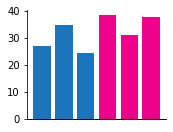

In [5]:
x = np.arange(6)
y = df.sum()/1000000

mask1 = x < 3
mask2 = x >= 3

fig, ax = plt.subplots(figsize=(2.5,2))
ax.bar(x[mask1], y[mask1], color = '#1c75bc')
ax.bar(x[mask2], y[mask2], color = '#ec008c')

ax.spines['right'].set_color('none')
ax.spines['top'].set_position('zero')
plt.xticks([])

# fig.savefig('../figure/RNAseq_QC/million_reads.pdf', bbox_inches='tight')

In [6]:
df_CPM = df.div(df.sum(axis=0), axis=1) * 1e6  

([], [])

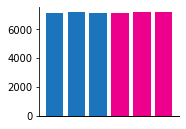

In [7]:
x = np.arange(6)
y = (df_CPM > 3).sum(0)

mask1 = x < 3
mask2 = x >= 3

fig, ax = plt.subplots(figsize=(2.5,2))
ax.bar(x[mask1], y[mask1], color = '#1c75bc')
ax.bar(x[mask2], y[mask2], color = '#ec008c')

ax.spines['right'].set_color('none')
ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_position('zero')
plt.xticks([])

# fig.savefig('../figure/RNAseq_QC/genes_detected.pdf', bbox_inches='tight')

In [8]:
df_logCPM = np.log2(df_CPM + 1)

([], [])

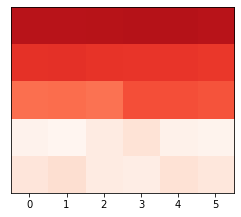

In [9]:
fig, ax = plt.subplots(figsize=(4,4))

# get expression for Act5C, nSyb, Oaz, peb, and repo
ax.imshow(df_logCPM.loc[['FBgn0000042','FBgn0013342','FBgn0261613','FBgn0003053','FBgn0011701']],
          cmap='Reds', vmin=0, vmax=16)

plt.yticks([])
# fig.savefig('../figure/RNAseq_QC/selected_genes.pdf', bbox_inches='tight')

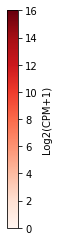

In [10]:
x = [0, 16]
y = [0, 16]
c = [0, 16.0]
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sc = ax.scatter(x, y, c=c, cmap="Reds")
plt.gca().set_visible(False)
fig.colorbar(sc, label="Log2(CPM+1)")
# fig.savefig('../figure/RNAseq_QC/colorbar.pdf', bbox_inches='tight')

Differential gene expression was calculated with R package edgeR. Please see Bulk_RNAseq_analysis.R for details. The output is used for analysis in the following sections

# Identify pathways that Acj6 regulates transcriptionally

In [12]:
df_RNA = pd.read_csv('../data/RNAseq.csv', index_col=0)
df_RNA = df_RNA.set_index('external_gene_name')
df_RNA = df_RNA[df_RNA.index.notna()]
df_RNA

,flybase_gene_id,description,logFC,AveExpr,t,P.Value,adj.P.Val,B
external_gene_name,,,,,,,,
asRNA:CR43454,FBgn0263408,antisense RNA:CR43454,8.272591,-1.770454,4.369214,0.001423,0.033806,-3.687251
lncRNA:CR44208,FBgn0265106,long non-coding RNA:CR44208,7.888933,-0.625917,3.591068,0.004974,0.072042,-3.839490
Osi7,FBgn0037414,Osiris 7,7.279911,-2.152335,3.256560,0.008700,0.098733,-3.948491
Klp59D,FBgn0034827,Kinesin-like protein at 59D,6.849394,-0.470699,2.602135,0.026530,0.197644,-4.115875
CG30046,FBgn0050046,NaN,6.736080,-0.849959,2.503489,0.031406,0.215097,-4.149914
...,...,...,...,...,...,...,...,...
CG13722,FBgn0035553,NaN,-6.794374,-0.781520,-2.221457,0.050744,0.274040,-4.240656
Cpr51A,FBgn0033942,Cuticular protein 51A,-7.877117,-0.767109,-2.948126,0.014683,0.135256,-4.013055
CG1850,FBgn0033154,NaN,-8.187841,0.987664,-2.549659,0.029022,0.207280,-4.125830


In [13]:
df_RNA = df_RNA.sort_values('logFC', ascending=False)

In [15]:
sig_genes = list(df_RNA[df_RNA['adj.P.Val']<0.05].index)
len(sig_genes)

439

In [16]:
df_RNA[df_RNA['adj.P.Val']<0.05]

,flybase_gene_id,description,logFC,AveExpr,t,P.Value,adj.P.Val,B
external_gene_name,,,,,,,,
asRNA:CR43454,FBgn0263408,antisense RNA:CR43454,8.272591,-1.770454,4.369214,0.001423,0.033806,-3.687251
Dhc62B,FBgn0013811,Dynein heavy chain at 62B,4.343278,2.057395,4.023328,0.002459,0.046233,-2.568749
Fatp3,FBgn0034999,Fatty acid transport protein 3,3.975345,3.699915,4.245873,0.001727,0.037533,-1.258235
Wnt2,FBgn0004360,Wnt oncogene analog 2,3.127892,4.564691,4.340592,0.001488,0.034647,-0.822774
esg,FBgn0001981,escargot,2.952019,2.995553,4.024229,0.002455,0.046233,-1.632816
...,...,...,...,...,...,...,...,...
CG8012,FBgn0040832,NaN,-2.129654,3.984548,-5.239721,0.000387,0.016162,0.230182
CG30184,FBgn0050184,NaN,-2.365697,3.154996,-4.937970,0.000601,0.019962,-0.474014
AstC,FBgn0032336,Allatostatin C,-2.510163,4.189883,-5.298371,0.000356,0.015645,0.321736


### enrichr

In [17]:
import gseapy as gp

In [19]:
gene_set = 'KEGG_2019'
enr_KEGG = gp.enrichr(gene_list=list(sig_genes), gene_sets=gene_set,organism='Fly')

In [20]:
enr_KEGG.results.sort_values('Adjusted P-value', ascending=True)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes
0,KEGG_2019,Hedgehog signaling pathway,6/38,0.000164,0.009211,0.002248,0.125916,-66.982297,583.594261,Pka-C1;Su(fu);cos;gish;rdx;CkIalpha
26,KEGG_2019,Protein processing in endoplasmic reticulum,10/132,0.000676,0.018867,0.012800,0.222542,-1.661775,12.130174,shv;Gcn2;Xbp1;CG6766;eff;GCS2alpha;Droj2;Hsp68...
23,KEGG_2019,MAPK signaling pathway,8/93,0.001011,0.018867,0.013184,0.222542,-2.436200,16.802617,chic;pros;eff;Src42A;msn;drk;cic;phyl
29,KEGG_2019,Endocytosis,9/121,0.001411,0.019753,0.019870,0.222542,-1.160861,7.619318,Gprk1;Vrp1;Efa6;Hrs;Vps45;step;Hsp68;Rho1;Arf79F
2,KEGG_2019,Dorso-ventral axis formation,4/28,0.003088,0.034585,0.016929,0.222542,-46.466548,268.588089,br;egh;enc;drk
5,KEGG_2019,N-Glycan biosynthesis,4/38,0.009375,0.087498,0.041526,0.332210,-45.945935,214.555128,xit;alpha-Man-IIa;GCS2alpha;Ost48
8,KEGG_2019,Sulfur metabolism,2/8,0.012331,0.093938,0.037477,0.332210,-26.150300,114.947587,CG14997;Papss
1,KEGG_2019,Glycosylphosphatidylinositol (GPI)-anchor bios...,3/24,0.015097,0.093938,0.051309,0.359164,-73.764644,309.313291,PGAP1;PIG-O;GAA1
18,KEGG_2019,Wnt signaling pathway,6/91,0.015057,0.093938,0.083160,0.465696,-7.349938,30.839684,Pka-C1;nmo;nkd;CkIalpha;CanB;Rho1
39,KEGG_2019,mTOR signaling pathway,6/96,0.019134,0.106840,0.100165,0.495402,-0.003403,0.013464,Atg1;chico;Vha55;CD98hc;drk;Rho1


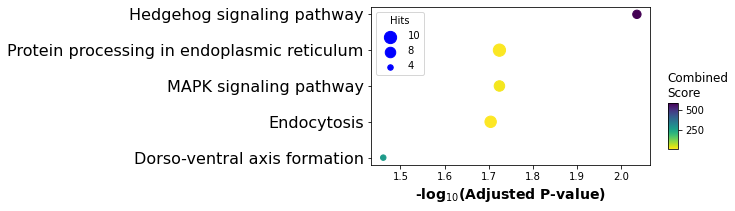

In [21]:
ax = gp.plot.dotplot(enr_KEGG.res2d, cmap='viridis_r', figsize=(5, 2.9))
ax.grid(False)
# ax.figure.savefig('../figure/RNAseq/KEGG_dotplot.pdf', bbox_inches='tight')

In [29]:
gene_exp = pd.read_csv("../data/NAME_log2_cpm_sub_norm.csv", index_col=0)

In [32]:
# run gsea
gs_res_sig = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                     gene_sets='../resources/KEGG_2019.gmt', # enrichr library names
                     cls= '../data/RNAseq.cls', # cls=class_vector
                     # set permutation_type to phenotype if samples >=15
                     permutation_num=1000, # reduce number to speed up test
                     outdir=None,  # do not write output to disk
                     no_plot=True, # Skip plotting
                     min_size=1,
                     method='signal_to_noise',
                     processes=4, seed= 7,
                     format='png')

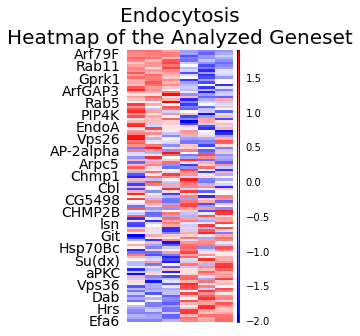

In [34]:
# plotting heatmap
term = 'Endocytosis'
genes = gs_res_sig.res2d.genes[term].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gp.plot.heatmap(df = gs_res_sig.heatmat.loc[genes], z_score=0, title=term, 
        figsize=(2,5),cmap='bwr',
        xticklabels=False, yticklabels=True)

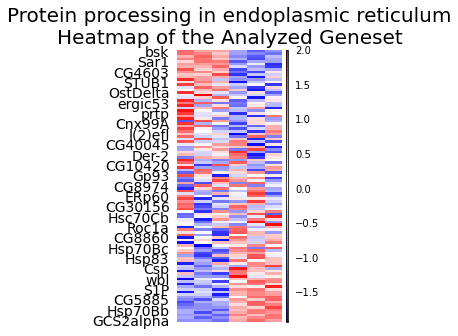

In [36]:
# plotting heatmap
term = 'Protein processing in endoplasmic reticulum'
genes = gs_res_sig.res2d.genes[term].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gp.plot.heatmap(df = gs_res_sig.heatmat.loc[genes], z_score=0, title=term, 
        figsize=(2,5),cmap='bwr',
        xticklabels=False, yticklabels=True)

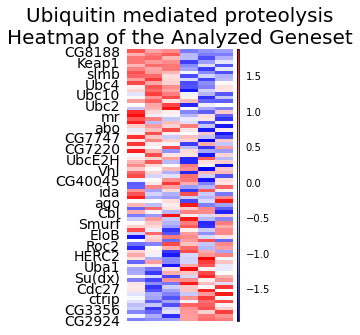

In [35]:
# plotting heatmap
term = 'Ubiquitin mediated proteolysis'
genes = gs_res_sig.res2d.genes[term].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gp.plot.heatmap(df = gs_res_sig.heatmat.loc[genes], z_score=0, title=term, 
        figsize=(2,5),cmap='bwr',
        xticklabels=False, yticklabels=True)